# Extracting, Loading, and Transforming Data from an OMOP CDM Database with EHRData

## Background
This jupyter notebook walks through the workflow which we want to refine, expand, and expand during the '24 hackathon!

In a nutshell
1. Extract data from a database of known schemata
2. Store this data in an ehrdata object (basically AnnData)
3. Validate this ehrdata object using lamin functionality (this step can be optional but is likely a nice thing to spread out our efforts)
4. Visualize things from this ehrdata object with Vitessce, either in a notebook or on cloud storage via lamin hub.

## OMOP
[OMOP](https://ohdsi.github.io/CommonDataModel/index.html) is a data model by [OHDSI](https://www.ohdsi.org/).

## Demo
### MIMIC IV OMOP Demo Dataset
Dataset available on [Physionet](https://physionet.org/content/mimic-iv-demo-omop/0.9/).

It describes ... .

Dataset:<br>
Kallfelz, M., Tsvetkova, A., Pollard, T., Kwong, M., Lipori, G., Huser, V., Osborn, J., Hao, S., & Williams, A. (2021). MIMIC-IV demo data in the OMOP Common Data Model (version 0.9). PhysioNet. https://doi.org/10.13026/p1f5-7x35.

Physionet:<br>
Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.

### Extract
Download data by zip or CLI.

### Load

Here, we use [duckdb](https://duckdb.org/)'s Python API to load csv tables as they are available from the link above. (which is absolutely useless for immediate purposes but why not)

In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
import anndata as ad
import duckdb
import ehrapy as ep
import ehrdata
import numpy as np

### Set up a local database connection

In [87]:
con = duckdb.connect()

Load the data into your database

In [88]:
ehrdata.dt.mimic_iv_omop(backend="duckdb", backend_handle=con)

Load downloaded tables from ehrapy_data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9
missing tables:  [['concept'], ['vocabulary'], ['domain'], ['concept_class'], ['concept_relationship'], ['relationship'], ['concept_synonym'], ['concept_ancestor'], ['source_to_concept_map'], ['drug_strength']]


See what tables there are

In [89]:
tables = con.execute("SHOW TABLES;").fetchall()
tables

[('care_site',),
 ('cdm_source',),
 ('cohort',),
 ('cohort_definition',),
 ('condition_era',),
 ('condition_occurrence',),
 ('cost',),
 ('death',),
 ('device_exposure',),
 ('dose_era',),
 ('drug_era',),
 ('drug_exposure',),
 ('fact_relationship',),
 ('location',),
 ('measurement',),
 ('metadata',),
 ('note',),
 ('note_nlp',),
 ('observation',),
 ('observation_period',),
 ('payer_plan_period',),
 ('person',),
 ('procedure_occurrence',),
 ('provider',),
 ('specimen',),
 ('visit_detail',),
 ('visit_occurrence',)]

### Transform
ehrapy allows many reproducible, documented transformation steps to get data from its backend into formats that are
- useful for machine learning (sklearn & pypots)
- useful for exploratory analysis (ehrapy suite)
- useful for visualization (vitessce ehrapyviewer)



In [66]:
obs = ehrdata.io.extract_person(con)
obs.head()

,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id,care_site_id,person_source_value,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id
0,3589912774911670296,8507,2095,None,None,None,0,38003563,None,None,None,10009628,M,0,None,0,HISPANIC/LATINO,2000001408
1,-3210373572193940939,8507,2079,None,None,None,0,38003563,None,None,None,10011398,M,0,None,0,HISPANIC/LATINO,2000001408
2,-775517641933593374,8507,2149,None,None,None,8516,0,None,None,None,10004235,M,0,BLACK/AFRICAN AMERICAN,2000001406,None,0
3,-2575767131279873665,8507,2050,None,None,None,8516,0,None,None,None,10024043,M,0,BLACK/AFRICAN AMERICAN,2000001406,None,0
4,-8970844422700220177,8507,2114,None,None,None,8527,0,None,None,None,10038933,M,0,WHITE,2000001404,None,0


In [67]:
obs2 = ehrdata.io.extract_observation_period(con)
obs2.head()

,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id,...,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id,observation_period_id,observation_period_start_date,observation_period_end_date,period_type_concept_id
0,-3210373572193940939,8507,2079,None,None,None,0,38003563,None,None,...,M,0,None,0,HISPANIC/LATINO,2000001408,2193156378042005101,2146-05-28,2147-03-26,32828
1,-775517641933593374,8507,2149,None,None,None,8516,0,None,None,...,M,0,BLACK/AFRICAN AMERICAN,2000001406,None,0,8196716582395037703,2196-02-24,2196-06-22,32828
2,-2575767131279873665,8507,2050,None,None,None,8516,0,None,None,...,M,0,BLACK/AFRICAN AMERICAN,2000001406,None,0,-4712462436630318946,2116-06-25,2117-06-09,32828
3,-8970844422700220177,8507,2114,None,None,None,8527,0,None,None,...,M,0,WHITE,2000001404,None,0,-9178218221840740161,2148-09-10,2148-09-23,32828
4,4668337230155062633,8507,2073,None,None,None,8527,0,None,None,...,M,0,WHITE,2000001404,None,0,4438236770478758867,2116-12-02,2117-12-06,32828


##### Interlude - Irregularly sampled time series data
Electronic health records can be regarded as (that is, form a model of a person via) irregular sampling irregularly sampled time series.

Following notation and explanation from [Horn et al.](https://proceedings.mlr.press/v119/horn20a.html), a time series of a patient can be described as a set of tuples (t, z, m), where t denotes the time, z the observed value, and m a modality description of the measurement.

The time series can have different lengths, and a "typical" number of observed values might not exist.

Generally, an irregularly-sampled time series can be converted into a missing data problem by discretizing the time axis into non-overlapping intervals, and declaring intervals in which no data was sampled as missing (Bahadori & Lipton, 2019). [Horn et al.](https://proceedings.mlr.press/v119/horn20a.html).

EHRData's extract_XXXX extracts irregularly sampled time series from OMOP tables XXX.

TODO add illustration

EHRData's time_interval_table transforms this into the missing data problem with discretized time axis.

TODO add illustration


In [68]:
ts = ehrdata.io.extract_measurement(con)  # today: ts into layers["timestamp"] and layers["value"]
ts

<Array [[[[], []], [...], ..., [[], []]], ...] type='100 * var * var * var ...'>

In [69]:
time_interval_table = ehrdata.io.time_interval_table(
    ts, obs2
)  # today: time_interval_table into layers["time_interval_table"]
# ehrdata.io.time_interval_table(
#     duckdb_instance=duckdb,
#     start_time="patient_hospital_entry",  # TODO: sync with omop lingo; that could be "cohort index date", but maybe is something different. Ref: https://ohdsi.github.io/TheBookOfOhdsi/Cohorts.html time zero for the time interval matrix
#     observation_duration=250,  # in d, time end for the time interval matrix
#     concept_ids="all",  # features to use
#     interval_length=1,  # length of the  statustiit come intervals
#     interval_unit="minutes",  # unit of the time intervals
# )

In [70]:
np.array(time_interval_table).shape

TODO: all of this within edata. for now assemble it here for a rough vibe check

In [71]:
edata = ad.AnnData(X=np.zeros((100, 1)), obs=obs2)
edata.obsm["ts"] = ts
edata.obsm["time_interval_table"] = np.array(time_interval_table)
edata

AnnData object with n_obs × n_vars = 100 × 1
    obs: 'person_id', 'gender_concept_id', 'year_of_birth', 'month_of_birth', 'day_of_birth', 'birth_datetime', 'race_concept_id', 'ethnicity_concept_id', 'location_id', 'provider_id', 'care_site_id', 'person_source_value', 'gender_source_value', 'gender_source_concept_id', 'race_source_value', 'race_source_concept_id', 'ethnicity_source_value', 'ethnicity_source_concept_id', 'observation_period_id', 'observation_period_start_date', 'observation_period_end_date', 'period_type_concept_id'
    obsm: 'ts', 'time_interval_table'

In [72]:
# create interval table
time_interval_table2 = ehrdata.io.time_interval_table(
    # duckdb_instance=ts,
    ts,
    edata.obs,
    start_time="patient_hospital_entry",  # TODO: sync with omop lingo; that could be "cohort index date", but maybe is something different. Ref: https://ohdsi.github.io/TheBookOfOhdsi/Cohorts.html time zero for the time interval matrix
    observation_duration=250,  # in d, time end for the time interval matrix
    concept_ids="all",  # features to use
    interval_length=1,  # length of the time intervals
    interval_unit="minutes",  # unit of the time intervals
)

In [73]:
# n_patients x n_intervals x n_features
np.array(time_interval_table2).shape

#### Q: why is any of this interesting?
#### A: because now ehrapy and more tools in the future of its ecosystem (like with scanpy) can nicely access this!

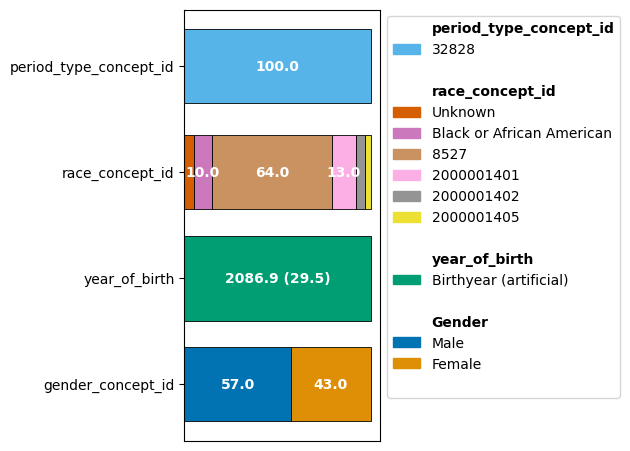

In [74]:
ct = ep.tl.CohortTracker(
    edata,
    columns=["gender_concept_id", "year_of_birth", "race_concept_id", "period_type_concept_id"],
    categorical=["gender_concept_id", "race_concept_id", "period_type_concept_id"],
)

ct(edata)

ct.plot_cohort_barplot(
    legend_labels={
        0: "Unknown",
        8516: "Black or African American",
        "year_of_birth": "Birthyear (artificial)",
        8507: "Male",
        8532: "Female",
    },
    legend_subtitles_names={"gender_concept_id": "Gender"},
)

Introduce dummy .obsm data for plot below

In [82]:
rng = np.random.default_rng(2)
edata.obsm["random"] = rng.standard_normal((edata.shape[0], 2))

### Optional/tbd: validation with Lamin

In [15]:
# tbd

### Visualization with Vitessce in notebook

1. Import dependencies

In [75]:
from os.path import isdir, join

from vitessce import (
    AnnDataWrapper,
    VitessceConfig,
)
from vitessce import (
    Component as cm,
)
from vitessce import (
    CoordinationType as ct,
)
from vitessce.data_utils import (
    VAR_CHUNK_SIZE,
    optimize_adata,
)

2. Save the AnnData object to Zarr

In [83]:
zarr_filepath = join("data", "dummy_ehrdata2.zarr")
if not isdir(zarr_filepath):
    edata = optimize_adata(
        edata,
        obs_cols=["gender_concept_id"],
        obsm_keys=["random"],
        optimize_X=True,
    )
    edata.write_zarr(zarr_filepath, chunks=[edata.shape[0], VAR_CHUNK_SIZE])
else:
    print(f"path exists, did not write new file: {zarr_filepath}")

3. Create a Vitessce view config

In [84]:
vc = VitessceConfig(schema_version="1.0.15", name="Dummy EHRData")
dataset = vc.add_dataset(name="Dummy EHRData").add_object(
    AnnDataWrapper(
        adata_store=zarr_filepath,
        obs_set_paths=["obs/gender_concept_id"],
        obs_set_names=["Gender Concept ID"],
        obs_embedding_paths=["obsm/random"],
        obs_embedding_names=["Random"],
        obs_feature_matrix_path="X",
    )
)

umap = vc.add_view(cm.SCATTERPLOT, dataset=dataset, mapping="Random")
# pca = vc.add_view(cm.SCATTERPLOT, dataset=dataset, mapping="PCA")
cell_sets = vc.add_view(cm.OBS_SETS, dataset=dataset)
obs_set_sizes = vc.add_view(cm.OBS_SET_SIZES, dataset=dataset)
genes = vc.add_view(cm.FEATURE_LIST, dataset=dataset)
heatmap = vc.add_view(cm.HEATMAP, dataset=dataset)

vc.layout((umap / obs_set_sizes) | ((cell_sets | genes) / heatmap))

4. Create the Vitessce widget

In [85]:
vw = vc.widget()
vw

VitessceWidget(config={'version': '1.0.15', 'name': 'Dummy EHRData', 'description': '', 'datasets': [{'uid': '…

Should look like this:
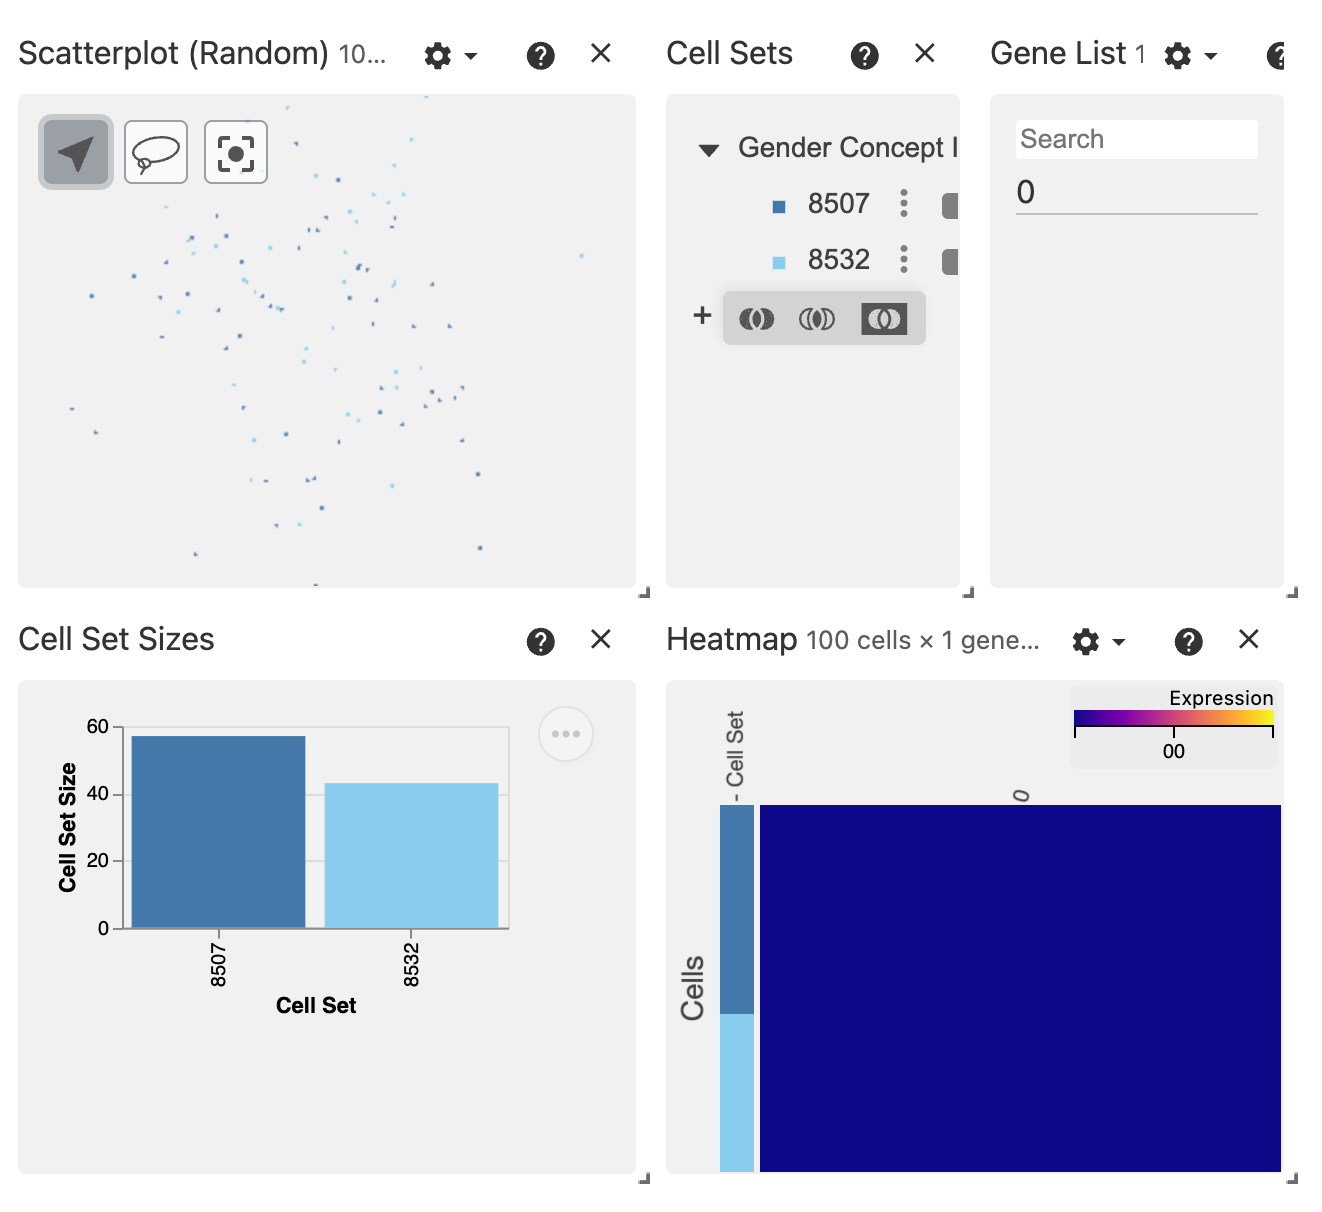

### Visualization with Vitessce on lamin
Uploading dataset on lamin allows even easier sharing and looking at dataset together. Together with the dedicated validation functionality that lamin has and we might extend, this makes lamin + ehrdata a powerful coupling.

In [60]:
import lamindb as ln

→ connected lamindb: theislab/ehr


In [53]:
!lamin login eroell

✓ logged in with email eljas.roellin@ikmail.com (uid: BPsyNFEx)


In [58]:
!lamin load theislab/ehr

→ connected lamindb: theislab/ehr


In [61]:
zarr_artifact = ln.Artifact(
    zarr_filepath,
    description="Dummy EHRDataset",
)
zarr_artifact.save()

! no run & transform got linked, call `ln.track()` & re-run
... uploading dummy_ehrdata.zarr: 100.0%


Artifact(uid='IITWOkou2A6FQ1l90000', is_latest=True, description='Dummy EHRDataset', suffix='.zarr', size=4382, hash='pesCo1VSDk8vM5qz8JPGIg', n_objects=33, _hash_type='md5-d', _accessor='AnnData', visibility=1, _key_is_virtual=True, storage_id=1, created_by_id=2, created_at=2024-10-03 15:02:31 UTC)

In [79]:
vc = VitessceConfig(schema_version="1.0.15", description=zarr_artifact.description, name="Dummy EHRData")
dataset = vc.add_dataset(name="Dummy EHRData").add_object(
    AnnDataWrapper(
        adata_url=zarr_artifact.path.to_url(),  # THIS needed to change w.r.t before
        obs_set_paths=["obs/gender_concept_id"],
        obs_set_names=["Gender Concept ID"],
        obs_embedding_paths=["obsm/random"],
        obs_embedding_names=["Random"],
        obs_feature_matrix_path="X",
    )
)

umap = vc.add_view(cm.SCATTERPLOT, dataset=dataset, mapping="Random")
# pca = vc.add_view(cm.SCATTERPLOT, dataset=dataset, mapping="PCA")
cell_sets = vc.add_view(cm.OBS_SETS, dataset=dataset)
obs_set_sizes = vc.add_view(cm.OBS_SET_SIZES, dataset=dataset)
genes = vc.add_view(cm.FEATURE_LIST, dataset=dataset)
heatmap = vc.add_view(cm.HEATMAP, dataset=dataset)

vc.layout((umap / obs_set_sizes) | ((cell_sets | genes) / heatmap))

In [80]:
from lamindb.integrations import save_vitessce_config

In [81]:
vc_artifact = save_vitessce_config(vc, description="Dummy EHRDataset")

... uploading config.vitessce.json: 100.0%
→ go to: https://lamin.ai/theislab/ehr/artifact/Ub01v0M2DGlZSFn20000


Now our data is stored on the cloud, managed by lamin:
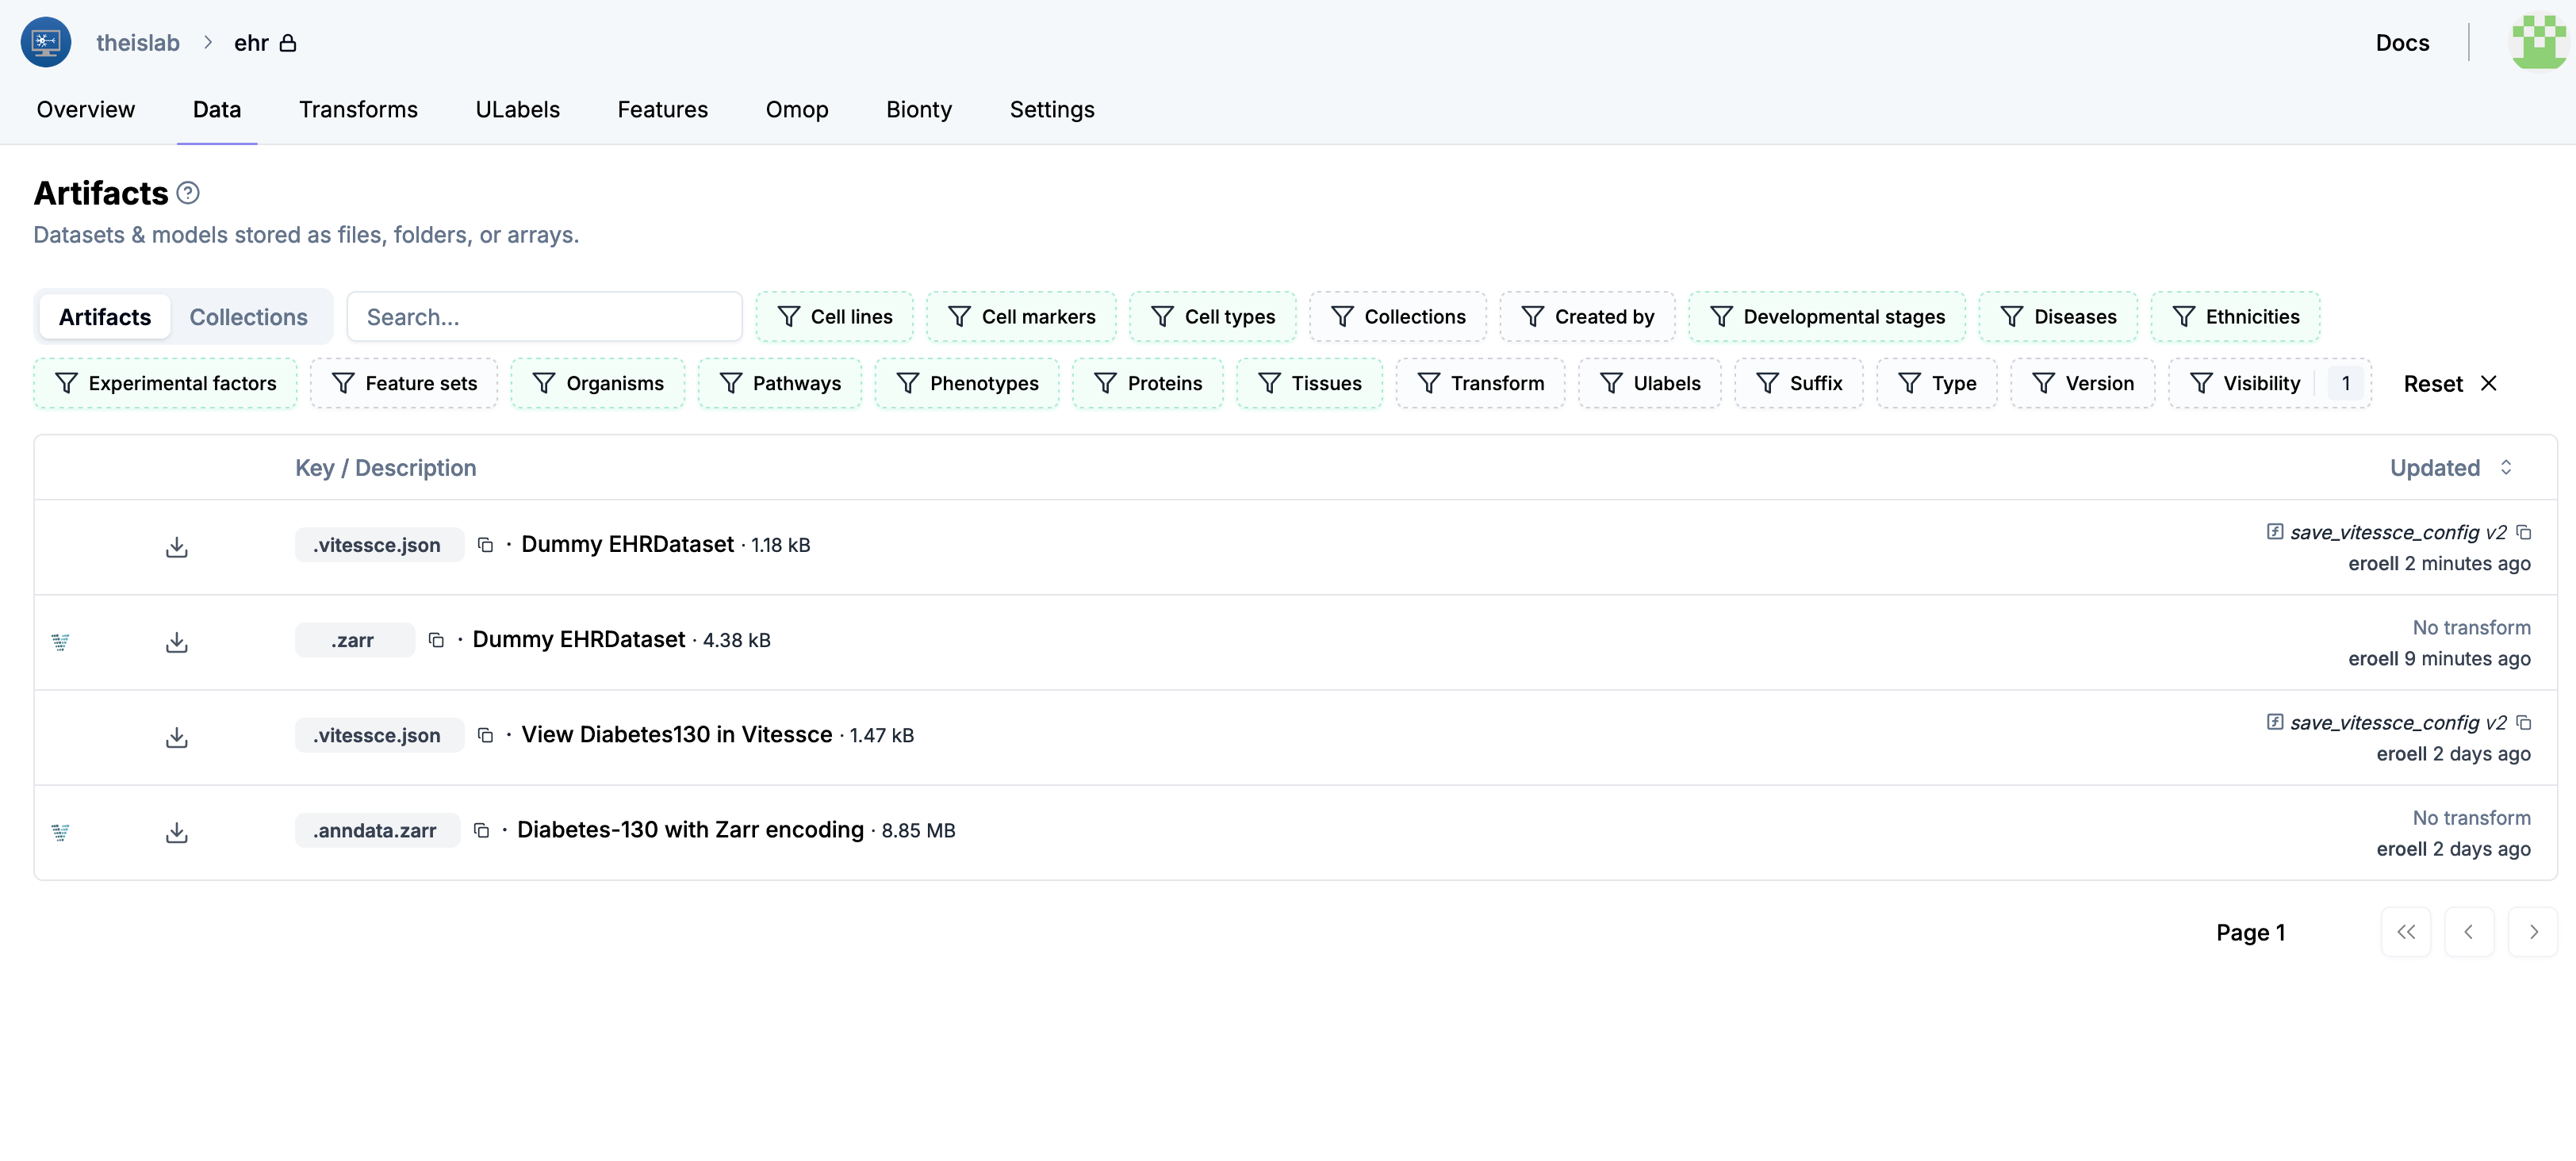

Now we can share the data with others easily, and give them a look at it: all they need is access to our lamin storage & click the vitessce button next to the dataset in their browser!
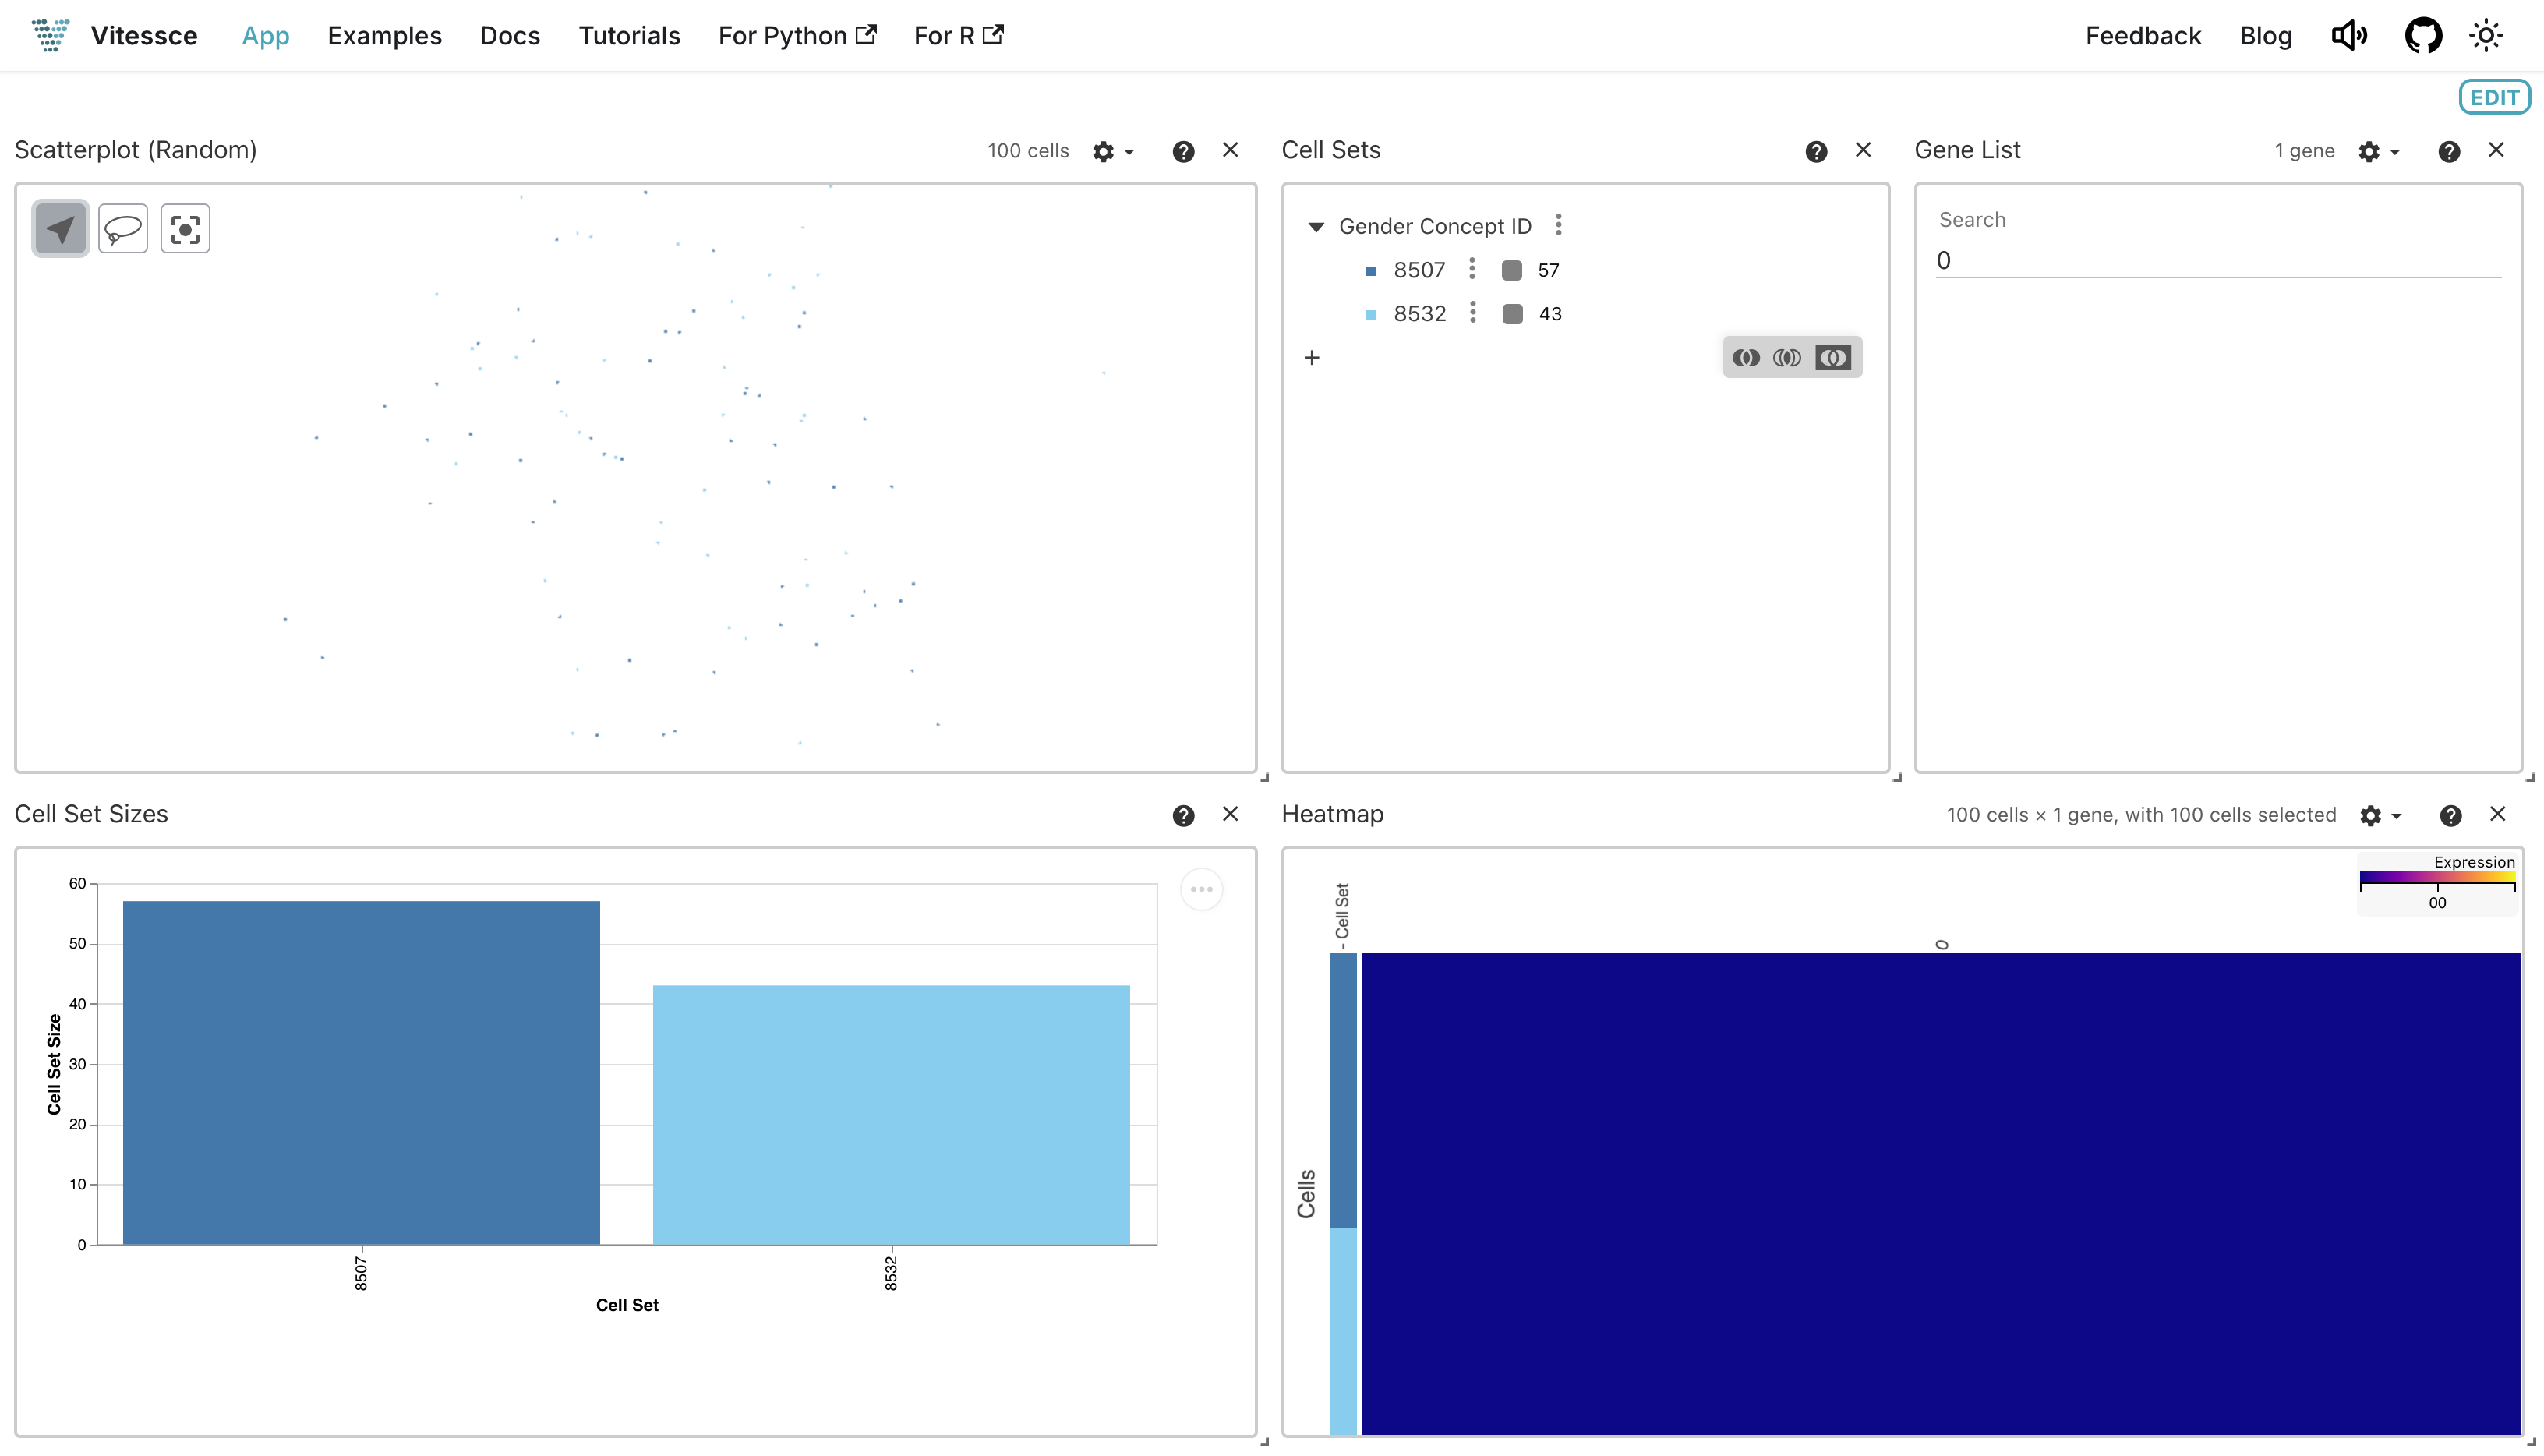

### Bonus: Lamin utility
Using lamin offers a lot of powerful tracking of our data and how we operated on it.

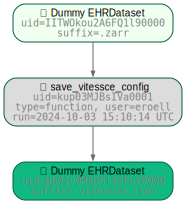

In [82]:
vc_artifact.view_lineage()